In [ ]:
!pip install yfinance
!pip install pandas_ta

     |████████████████████████████████| 6.3 MB 7.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=3f973b7a973499b4bda56fe67cfa10d0395af1fd67d98e3789a16a46be66f173
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 115 kB 5.0 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=4a68de38bc5ce3dddb2f4b1e680876ae5dd38475501b896c93f630342c2443d0
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
#Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#import questionary
import sys
import pandas_ta as pta
#pandas_ta library

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

In [ ]:
stock_choice = "MSFT" #@param ["JNJ", "PG", "KO", "MSFT", "AAPL", "NFLX", "BTC", "TKAT", "TSLA"]


In [ ]:
tickers = yf.Ticker(stock_choice)

df = pd.DataFrame(tickers.history(start="2016-10-02", end="2021-10-07", interval="1d"))
print(stock_choice)
df

MSFT


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-10-03,53.117386,53.246917,52.793557,53.126637,19189500,0.0,0
2016-10-04,52.987850,53.293174,52.710282,52.960094,20085900,0.0,0
2016-10-05,53.006360,53.626262,52.978601,53.330189,16726400,0.0,0
2016-10-06,53.422707,53.533733,52.997099,53.422707,16212600,0.0,0
2016-10-07,53.524479,53.644760,53.126630,53.478218,20089000,0.0,0
...,...,...,...,...,...,...,...
2021-09-30,285.709991,287.829987,281.619995,281.920013,32325800,0.0,0
2021-10-01,282.119995,289.980011,281.290009,289.100006,30086300,0.0,0
2021-10-04,287.399994,287.750000,280.250000,283.109985,31350700,0.0,0


In [ ]:
#sort data
close_df = df['Close']
close_df = pd.DataFrame(close_df)
close_df['Actual return'] = close_df.pct_change()

In [ ]:
#Generate fast, slow SMAs and RSI

close_df['RSI'] = pta.rsi(close_df['Close'], length = 14)
close_df['7_SMA'] = pta.sma(close_df['Close'], length = 7)
close_df['21_SMA'] = pta.sma(close_df['Close'], length = 21)
close_df['50_SMA'] = pta.sma(close_df['Close'], length = 50)
close_df['200_SMA'] = pta.sma(close_df['Close'], length = 200)

In [ ]:
#Initialize new signal column
close_df['Signal'] = 0.0
#When Actual Returns are greater or less than 0, generate signal to sell or buy stock long or short
close_df.loc[(close_df['Actual return'] >= 0), 'Signal'] = 1
close_df.loc[(close_df['Actual return'] < 0), 'Signal'] = -1

#When RSI is less than 30, generate signal to buy.  If higher than 70, generate signal to sell.
close_df.loc[(close_df['RSI'] >= 30), 'RSI Signal'] = 1
close_df.loc[(close_df['RSI'] < 70), 'RSI Signal'] = -1

#When 7 SMA is greater than 21 SMA, generate buy signal.  
#When 7 SMA is less than 21 SMA, generate sell signal.
close_df.loc[(close_df['7_SMA'] >= close_df['21_SMA']), '7_21_Signal'] = 1
close_df.loc[(close_df['7_SMA'] < close_df['21_SMA']),'7_21_Signal'] = -1

#When 50 SMA is greater than 200 SMA, generate buy signal.  
#When 50 SMA is less than 200 SMA, generate sell signal
close_df.loc[(close_df['50_SMA'] >= close_df['200_SMA']), '50_200_Signal'] = 1
close_df.loc[(close_df['50_SMA'] < close_df['200_SMA']),'50_200_Signal'] = -1

# Calculate the strategy returns and add them to the signals_df DataFrame
#close_df['Strategy return'] = close_df['Actual return'] * close_df['SMA Signal'].shift()
close_df = close_df.dropna()
close_df

,Close,Actual return,RSI,7_SMA,21_SMA,50_SMA,200_SMA,Signal,RSI Signal,7_21_Signal,50_200_Signal
Date,,,,,,,,,,,
2017-07-19,69.612915,0.007640,69.108402,68.156063,66.426801,66.022759,60.496094,1.0,-1.0,1.0,1.0
2017-07-20,69.952179,0.004874,70.422841,68.725597,66.620236,66.127819,60.580222,1.0,1.0,1.0,1.0
2017-07-21,69.546928,-0.005793,66.768234,69.081056,66.778217,66.219713,60.663156,-1.0,-1.0,1.0,1.0
2017-07-24,69.367836,-0.002575,65.158926,69.327450,66.928119,66.323956,60.743344,-1.0,-1.0,1.0,1.0
2017-07-25,69.923912,0.008016,67.757526,69.517298,67.061864,66.440821,60.825850,1.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,281.920013,-0.007324,32.188659,291.585715,296.874284,294.156638,256.411415,-1.0,-1.0,-1.0,1.0
2021-10-01,289.100006,0.025468,43.715777,290.231432,296.268094,294.226772,256.793223,1.0,-1.0,-1.0,1.0
2021-10-04,283.109985,-0.020720,37.923888,287.881430,295.409046,294.106642,257.119498,-1.0,-1.0,-1.0,1.0


In [ ]:
print(stock_choice)

macd_df = df.ta.macd(close="Close", fast=12, slow=26, signal=9, append=True)
macd_df

MSFT


,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2016-10-03,NaN,NaN,NaN
2016-10-04,NaN,NaN,NaN
2016-10-05,NaN,NaN,NaN
2016-10-06,NaN,NaN,NaN
2016-10-07,NaN,NaN,NaN
...,...,...,...
2021-09-30,-2.191707,-2.437926,0.246219
2021-10-01,-2.280225,-2.021155,-0.259070
2021-10-04,-2.801427,-2.033886,-0.767541


In [ ]:
 macd_df['macd_signal'] = 0.0

In [ ]:
#generating trading signal 0 or 1
#where 1 is bullish MACD > Signal
#0 is where condition is not met

macd_df["macd_signal"] = np.where(macd_df["MACD_12_26_9"] > macd_df["MACDs_12_26_9"], 1.0, -1.0)
macd_df.tail(5)

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_signal
Date,,,,
2021-09-30,-2.191707,-2.437926,0.246219,-1.0
2021-10-01,-2.280225,-2.021155,-0.259070,-1.0
2021-10-04,-2.801427,-2.033886,-0.767541,-1.0
2021-10-05,-2.727137,-1.567677,-1.159460,-1.0
2021-10-06,-2.290848,-0.905110,-1.385738,-1.0


In [ ]:
#calculate points when signal value changes
#identify entry/exit points (entry = 1 / exit = -1)
macd_df["Macd Entry/Exit"] = macd_df["macd_signal"].diff()
macd_df

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_signal,Macd Entry/Exit
Date,,,,,
2016-10-03,NaN,NaN,NaN,-1.0,NaN
2016-10-04,NaN,NaN,NaN,-1.0,0.0
2016-10-05,NaN,NaN,NaN,-1.0,0.0
2016-10-06,NaN,NaN,NaN,-1.0,0.0
2016-10-07,NaN,NaN,NaN,-1.0,0.0
...,...,...,...,...,...
2021-09-30,-2.191707,-2.437926,0.246219,-1.0,0.0
2021-10-01,-2.280225,-2.021155,-0.259070,-1.0,0.0
2021-10-04,-2.801427,-2.033886,-0.767541,-1.0,0.0


In [ ]:
ta_df = pd.concat([close_df, macd_df], axis=1).dropna()
ta_df.head()

,Close,Actual return,RSI,7_SMA,21_SMA,50_SMA,200_SMA,Signal,RSI Signal,7_21_Signal,50_200_Signal,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_signal,Macd Entry/Exit
Date,,,,,,,,,,,,,,,,
2017-07-19,69.612915,0.007640,69.108402,68.156063,66.426801,66.022759,60.496094,1.0,-1.0,1.0,1.0,0.839012,0.441134,0.397879,1.0,0.0
2017-07-20,69.952179,0.004874,70.422841,68.725597,66.620236,66.127819,60.580222,1.0,1.0,1.0,1.0,0.966556,0.454942,0.511614,1.0,0.0
2017-07-21,69.546928,-0.005793,66.768234,69.081056,66.778217,66.219713,60.663156,-1.0,-1.0,1.0,1.0,1.023141,0.409222,0.613920,1.0,0.0
2017-07-24,69.367836,-0.002575,65.158926,69.327450,66.928119,66.323956,60.743344,-1.0,-1.0,1.0,1.0,1.041528,0.342087,0.699441,1.0,0.0
2017-07-25,69.923912,0.008016,67.757526,69.517298,67.061864,66.440821,60.825850,1.0,-1.0,1.0,1.0,1.088424,0.311186,0.777238,1.0,0.0


In [ ]:
ta_signals = ta_df[['Signal','RSI Signal','7_21_Signal','50_200_Signal','macd_signal']]

ss = ta_signals['Signal'] + ta_signals['RSI Signal'] + ta_signals['7_21_Signal'] + ta_signals['50_200_Signal'] + ta_signals['macd_signal']

ta_signals = pd.concat([ta_signals,ss], axis=1)
ta_signals = ta_signals.rename(columns={0:'final signal'})
ta_signals

def t_signal (row):
  if row['final signal'] == 5:
    return 1
  if row['final signal'] == 3:
    return 1
  if row['final signal'] == 1:
    return 1
  if row['final signal'] == -1:
    return -1
  if row['final signal'] == -3:
    return -1
  if row['final signal'] == -5:
    return -1
 # if row['final signal']== -1 or 1:
 #   return 0
ta_signals['t signal'] = ta_signals.apply (lambda row: t_signal(row), axis=1)

# Calculate the strategy returns and add them to the signals_df DataFrame
ta_signals['Strategy return'] = close_df['Actual return'] * ta_signals['t signal'].shift()
ta_signals = ta_signals.dropna()
print()
print(f"Technical Signals for {stock_choice}")
ta_signals.head(15)


Technical Signals for MSFT


,Signal,RSI Signal,7_21_Signal,50_200_Signal,macd_signal,final signal,t signal,Strategy return
Date,,,,,,,,
2017-07-20,1.0,1.0,1.0,1.0,1.0,5.0,1,0.004874
2017-07-21,-1.0,-1.0,1.0,1.0,1.0,1.0,1,-0.005793
2017-07-24,-1.0,-1.0,1.0,1.0,1.0,1.0,1,-0.002575
2017-07-25,1.0,-1.0,1.0,1.0,1.0,3.0,1,0.008016
2017-07-26,-1.0,-1.0,1.0,1.0,1.0,1.0,1,-0.001887
2017-07-27,-1.0,-1.0,1.0,1.0,1.0,1.0,1,-0.012019
2017-07-28,-1.0,-1.0,1.0,1.0,1.0,1.0,1,-0.001640
2017-07-31,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1,-0.004655
2017-08-01,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1,0.001651


In [ ]:
#assign copy of the sma, MACD, rsi to a features DF X
X = ta_df[['RSI','7_SMA','21_SMA','MACD_12_26_9','MACDs_12_26_9','50_SMA','200_SMA']].shift().dropna()
# Create the target set selecting the Signal column and assiging it to y
y = ta_signals['t signal']

#select training period 
training_begin = X.index.min()
#select ending period for the training data 
training_end = X.index.min() + DateOffset(months=20)
print(training_begin)
print(training_end)

2017-07-20 00:00:00
2019-03-20 00:00:00


In [ ]:
#Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

#Generate the X_tet and y_test DF
X_test = X.loc[training_end+DateOffset(months=4):]
y_test = y.loc[training_end+DateOffset(months=4):]
print(X_train.head())
print(X_test.head())

                  RSI      7_SMA  ...     50_SMA    200_SMA
Date                              ...                      
2017-07-20  69.108402  68.156063  ...  66.022759  60.496094
2017-07-21  70.422841  68.725597  ...  66.127819  60.580222
2017-07-24  66.768234  69.081056  ...  66.219713  60.663156
2017-07-25  65.158926  69.327450  ...  66.323956  60.743344
2017-07-26  67.757526  69.517298  ...  66.440821  60.825850

[5 rows x 7 columns]
                  RSI       7_SMA  ...      50_SMA     200_SMA
Date                               ...                        
2019-07-22  56.521665  134.281544  ...  128.431911  112.720921
2019-07-23  62.594537  134.285730  ...  128.693474  112.841441
2019-07-24  65.089587  134.340131  ...  128.940116  112.966063
2019-07-25  68.814656  134.594025  ...  129.288238  113.109146
2019-07-26  66.003579  135.027869  ...  129.599156  113.252824

[5 rows x 7 columns]


In [ ]:
#scale the features DF
scaler = StandardScaler()
#Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
#Transform the X_train and X_test DF 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
#from imblearn.over_sampling import RandomOverSampler

#Use RandomOverSampler to resample the datase 
#ros = RandomOverSampler(random_state=1)
#X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
#y_train.value_counts()

In [ ]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
#initiate the model
lg = LogisticRegression()
#fit the model using training data
model = lg.fit(X_train_scaled, y_train)
#Use the test dataset to generate the prediction for the new model
logistic_pred = model.predict(X_test_scaled)

#classification report to evaluate the model
logistic_report = classification_report(y_test, logistic_pred)
print(logistic_report)

              precision    recall  f1-score   support

          -1       0.87      0.60      0.71       208
           1       0.80      0.95      0.87       351

    accuracy                           0.82       559
   macro avg       0.83      0.77      0.79       559
weighted avg       0.83      0.82      0.81       559



In [ ]:
#Import a new classifier from SKLearn - AdaBoostClassifer
from sklearn.ensemble import AdaBoostClassifier
#Initiate the model instance
ada = AdaBoostClassifier(n_estimators=1000, random_state=42)
#Fit the model using the training data
model= ada.fit(X_train_scaled, y_train)
#Use the test dataset to generate the predictions for the new model
ada_pred = model.predict(X_test_scaled)

#Classification report to evaluate the model
ada_training = classification_report(y_test, ada_pred)
print(ada_training)

              precision    recall  f1-score   support

          -1       0.68      0.66      0.67       208
           1       0.80      0.81      0.81       351

    accuracy                           0.76       559
   macro avg       0.74      0.74      0.74       559
weighted avg       0.76      0.76      0.76       559



In [ ]:

# Create a predictions DataFrame
lg_pred_df = pd.DataFrame(index=X_test.index)#.loc

# Add the SVM model predictions to the DataFrame
lg_pred_df['Predicted'] = logistic_pred

# Add the actual returns to the DataFrame
lg_pred_df['Actual Returns'] = close_df['Actual return']

# Add the strategy returns to the DataFrame
lg_pred_df['Strategy Returns'] = ta_signals['Strategy return'] * lg_pred_df['Predicted']
# Review the DataFrame
display(lg_pred_df.head())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2019-07-22,-1,0.013248,-0.013248
2019-07-23,1,0.006212,0.006212
2019-07-24,1,0.010267,0.010267
2019-07-25,1,-0.003766,-0.003766
2019-07-26,1,0.008203,-0.008203


In [ ]:
# Create a predictions DataFrame
ada_pred_df = pd.DataFrame(index=X_test.index)#.loc

# Add the SVM model predictions to the DataFrame
ada_pred_df['Predicted'] = ada_pred

# Add the actual returns to the DataFrame
ada_pred_df['Actual Returns'] = close_df['Actual return']

# Add the strategy returns to the DataFrame
ada_pred_df['Strategy Returns'] = ta_signals['Strategy return'] * ada_pred_df['Predicted']
# Review the DataFrame
ada_pred_df

,Predicted,Actual Returns,Strategy Returns
Date,,,
2019-07-22,-1,0.013248,-0.013248
2019-07-23,-1,0.006212,-0.006212
2019-07-24,1,0.010267,0.010267
2019-07-25,-1,-0.003766,0.003766
2019-07-26,1,0.008203,-0.008203
...,...,...,...
2021-09-30,-1,-0.007324,-0.007324
2021-10-01,-1,0.025468,0.025468
2021-10-04,-1,-0.020720,-0.020720


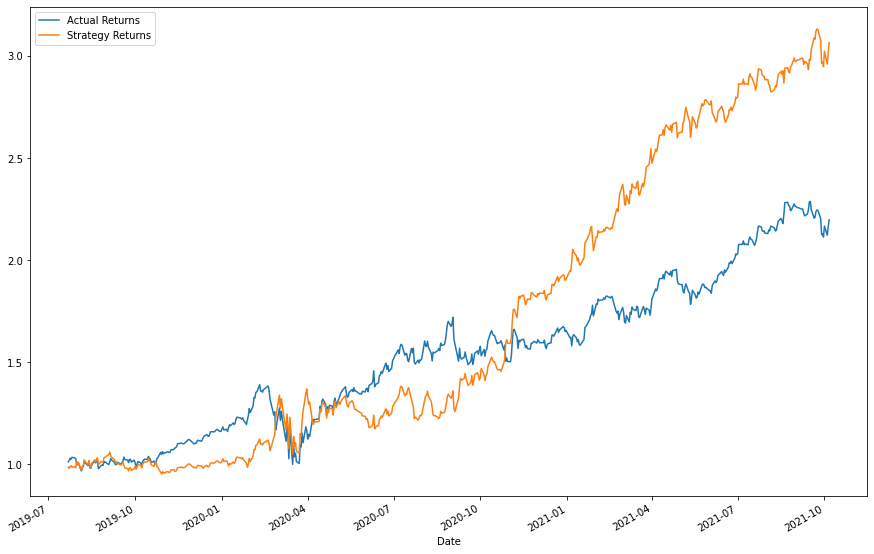

In [ ]:
# Plot the actual returns versus the strategy returns[AdaBoost]
chart1=(1+ada_pred_df[['Actual Returns','Strategy Returns']]).cumprod().plot(figsize=(15,10))

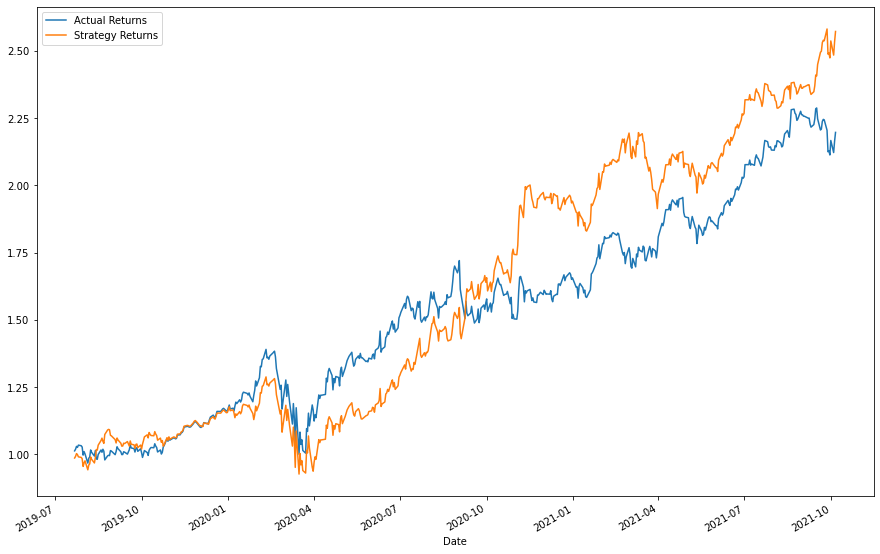

In [ ]:
# Plot the actual returns versus the strategy returns [LogisticRegression]
chart1=(1+lg_pred_df[['Actual Returns','Strategy Returns']]).cumprod().plot(figsize=(15,10))

In [ ]:
fig = make_subplots(rows=2,cols=1)

In [ ]:
#Price lines
fig.append_trace(go.Scatter(
    x=df.index,
    y=df["Close"],
    line=dict(color="orange", width=1),
    name="Close",
    legendgroup="1",
    
), row=1, col=1)

In [ ]:
#Candlestick chart
fig.append_trace(
    go.Candlestick(
        x=df.index,
        open=df["Open"],
        high=df["High"],
        low= df["Low"],
        close= df["Close"],
        increasing_line_color="green",
        decreasing_line_color="red",
        showlegend=False), row=1, col=1)

In [ ]:
#Fast signal
fig.append_trace(go.Scatter(
x=macd_df.index, y=macd_df["MACD_12_26_9"],
line=dict(color="yellow", width=2), name="macd",
legendgroup=2,),row=2, col=1)

#Slow signal
fig.append_trace(
go.Scatter(x=macd_df.index,
          y= macd_df["MACDs_12_26_9"],
          line=dict(color="orange", width=2),
          legendgroup="2",
          name="signal"), row=2, col=1)

In [ ]:
# Colorize the histogram values
colors = np.where(macd_df["MACDh_12_26_9"] < 0, "black", "purple")

In [ ]:
#plot histogram
fig.append_trace(
go.Bar(x=macd_df.index, y=macd_df["MACDh_12_26_9"],
      name="histogram", marker_color = colors,), row=2, col=1)

In [ ]:

#Update the layout
layout = go.Layout(
    title=f"{stock_choice} Candle stick chart & MACD Technical Analysis ",
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)

In [ ]:
#Print the charts
fig.update_layout(layout, yaxis_title = stock_choice)
fig.show()


In [ ]:
macd_df

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_signal,Macd Entry/Exit
Date,,,,,
2016-10-03,NaN,NaN,NaN,0.0,NaN
2016-10-04,NaN,NaN,NaN,0.0,0.0
2016-10-05,NaN,NaN,NaN,0.0,0.0
2016-10-06,NaN,NaN,NaN,0.0,0.0
2016-10-07,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...
2021-09-30,-1.644055,-0.823885,-0.820171,0.0,0.0
2021-10-01,-1.718494,-0.718659,-0.999835,0.0,0.0
2021-10-04,-2.037231,-0.829917,-1.207315,0.0,0.0
